# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### Import the libs

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading the data from a stata file

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


### Dataset with résumés that received callbacks

In [4]:
data_calls = data[['id','race','call', 'education', 'yearsexp']].loc[data['call']==1]
data_calls.head()

,id,race,call,education,yearsexp
85,b,w,1.0,2,7
95,b,w,1.0,2,4
105,b,w,1.0,4,6
107,b,b,1.0,4,6
126,b,b,1.0,4,9


### Callbacks for white and black-sounding names  (a summary)

In [5]:
# total résumés in the dataset
n = data.shape[0]

# Callback / white/black-sounding name
total_call = data['id'].loc[data['call'] ==1.0].count()
call_w = data['id'].loc[(data['race'] =='w') & (data['call'] ==1.0)].count()
call_b = data['id'].loc[(data['race'] =='b') & (data['call'] ==1.0)].count()

# Summary
print("Total résumés = %d Curricula Vitae (CV)" % n)
print("Total callbacks = %d calls (%.2f%% all CV)" % (total_call,(100*(total_call/n))))
print("...")
print("...Callback for with white-sounding name = %d or %.2f%% from résumés with callbacks;" % (call_w, (100*(call_w/total_call))))
print("...Callback for black-sounding name = %d or %.2f%% from résumés with callbacks." % (call_b, (100*(call_b/total_call))))
print("...")
print("...Callback for white-sounding name is %.2f%% greater than for black-sounding names" % (100*((call_w - call_b)/call_w)))

Total résumés = 4870 Curricula Vitae (CV)
Total callbacks = 392 calls (8.05% all CV)
...
...Callback for with white-sounding name = 235 or 59.95% from résumés with callbacks;
...Callback for black-sounding name = 157 or 40.05% from résumés with callbacks.
...
...Callback for white-sounding name is 33.19% greater than for black-sounding names


### Callbacks: a visual presentation

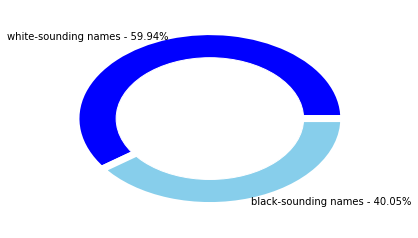

In [6]:
# create data
label_call_w = "white-sounding names - " + '{:.5}'.format(str(100*(call_w/total_call))) +"%"
label_call_b = "black-sounding names - " + '%.5s' % format(str(100*(call_b/total_call))) +"%"
names= label_call_w, label_call_b
size=[call_w, call_b]
 
# Create a circle for the center of the plot
inner_circle=plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['blue','skyblue'], labeldistance=1.0, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' })
p=plt.gcf()
p.gca().add_artist(inner_circle)
plt.show()

### 1.What test is appropriate for this problem? Does CLT apply?

- We have a problem with variables that represents ***categorical values***: 'b', 'w'.<br>
- For this type of analysis - **relationship of two categorical variables** -, their distribution in the dataset is often displayed in an **R×C table**, also referred to as a **contingency table** [1].
- In order to do **hypothesis testing** with categorical variables we use the **chi-square test** [1].

* Table 1. White-sounding and black-souding names versus callbacks

|     | Callback | No callback |
|:----|:--------:|:-----------:|
|white-sounding names | X% | Y% |
| black-sounding names | Z% | W% |                

#### Does CLT apply?
Yes.

### 2.What are the null and alternate hypotheses?

2.1 - Null hypothesis: **H0 => "Race has NOT a significant impact on the rate of callbacks for résumés".**

2.2 - Alternate hypothesis: **Ha => "Race has a significant impact on the rate of callbacks for résumés".**

### 3. Compute margin of error, confidence interval, and p-value

#### About résumés with callback:

In [7]:
# Dataframe with only the résumés with callback (data_calls)
data_calls.head()

,id,race,call,education,yearsexp
85,b,w,1.0,2,7
95,b,w,1.0,2,4
105,b,w,1.0,4,6
107,b,b,1.0,4,6
126,b,b,1.0,4,9


#### Sumary:

In [8]:
# Total résumés
n = data.shape[0]

# Total callbacks
n_call = data_calls.shape[0]

# Résumés white and black sounding names
total_white = data['id'].loc[(data['race'] =='w')].count()
total_black = data['id'].loc[(data['race'] =='b')].count()

# Perc.(%) white and black sounding names from total
perc_tot_white = total_white/n
perc_tot_black = total_black/n

# Perc.(%) white and black sounding names with callback
perc_call_white = call_w/n_call
perc_call_black = call_b/n_call

print("Total résumés with callback = %d" %n_call)
print("---------------------------------")
print("Perc.(%%) white-sounding names from total = %.2f%%" %(perc_tot_white*100))
print("Perc.(%%) black-sounding names from total = %.2f%%" %(perc_tot_black*100))
print("---------------------------------")
print("Perc.(%%) white-sounding names from callbacks = %.2f%%" %(perc_call_white*100))
print("Perc.(%%) black-sounding names from total = %.2f%%" %(perc_call_black*100))
print("---------------------------------")

Total résumés with callback = 392
---------------------------------
Perc.(%) white-sounding names from total = 50.00%
Perc.(%) black-sounding names from total = 50.00%
---------------------------------
Perc.(%) white-sounding names from callbacks = 59.95%
Perc.(%) black-sounding names from total = 40.05%
---------------------------------


#### Barplot: 'race' versus 'callback'

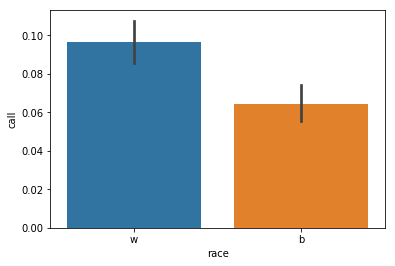

In [9]:
rc = data[['race','call']]
sns.barplot(x='race', y='call', data=rc)
plt.show()

#### Investigation: is there any relation between white/black-sounding names and education versus years of experience?

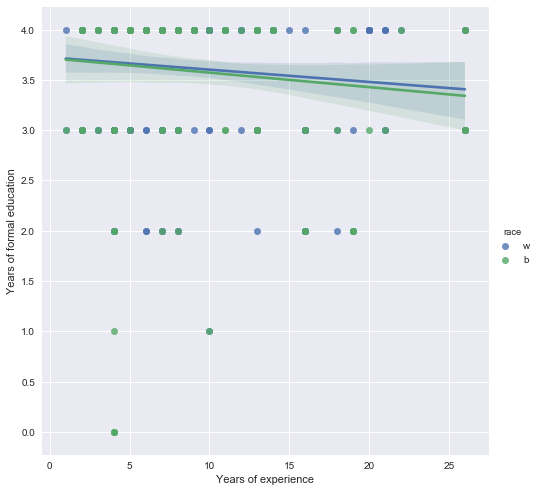

In [10]:
sns.set()

# Plot tip as a function of toal bill across days
g = sns.lmplot(x="yearsexp", y="education", hue="race",
               truncate=True, size=7, data=data_calls)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Years of experience", "Years of formal education")

In [11]:
# Arrays with callback:
#... w_callback = white-sounding name
#... b_callback = black-sounding name
w_callback = data_calls.iloc[:, 1][data_calls.race == 'w'].values
b_callback = data_calls.iloc[:, 1][data_calls.race == 'b'].values

#### Margin of error and confidence intervals for 'w' and 'b' groups

* For alfa=0,05 and degrees of freedom (df)=1, we have x2=3.84 or x=1.96

* White-sounding names

In [12]:
critical_value = 1.96
margin_error = np.sqrt((perc_call_white*(1-perc_call_white)/n))*critical_value
low_critical_value = perc_call_white - margin_error
high_critical_value = perc_call_white + margin_error
print("White-sounding names:")
print("---------------------")
print("Mean: ", perc_call_white)
print("Margin of error: ", margin_error)
print("---------------------")
print("Confidence interval: ")
print("...From = %.2f" %low_critical_value)
print("...To   = %.2f" %high_critical_value)

White-sounding names:
---------------------
Mean:  0.599489795918
Margin of error:  0.0137622448744
---------------------
Confidence interval: 
...From = 0.59
...To   = 0.61


* Black-sounding names

In [13]:
critical_value = 1.96
margin_error = np.sqrt((perc_call_black*(1-perc_call_black)/n))*critical_value
low_critical_value = perc_call_black - margin_error
high_critical_value = perc_call_black + margin_error
print("Black-sounding names:")
print("---------------------")
print("...Mean: ", perc_call_black)
print("...Margin of error: ", margin_error)
print("---------------------")
print("Confidence interval: ")
print("...From = %.2f" %low_critical_value)
print("...To   = %.2f" %high_critical_value)

Black-sounding names:
---------------------
...Mean:  0.400510204082
...Margin of error:  0.0137622448744
---------------------
Confidence interval: 
...From = 0.39
...To   = 0.41


### 4. Write a story describing the statistical significance in the context or the original problem.

Based on data, with 95% confidence, we know that 40% of the candidates that received a call has a black-sounding name. Considering a margin of error of XXX, we can not afirm that was a racial bias (pro white-sounding names). 

### 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

## References:

[1] "Statistics in a Nutshell", Boslaugh S., Watters A., O'Reilly (2008): https://www.amazon.com/Statistics-Nutshell-Desktop-Reference-OReilly/dp/0596510497/ref=sr_1_2?ie=UTF8&qid=1517168318&sr=8-2&keywords=Statistics+in+a+Nutshell%22%2C+Boslaugh 

[2] Documentation of "Scipy.Stats.TTest_ind": https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind 